## LOAD LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## LOAD DATA
do basic data checks

In [2]:
# Load the data
data = pd.read_csv('./data/education_career_success.csv')
data.head()

,Student_ID,Age,Gender,High_School_GPA,SAT_Score,University_Ranking,University_GPA,Field_of_Study,Internships_Completed,Projects_Completed,Certifications,Soft_Skills_Score,Networking_Score,Job_Offers,Starting_Salary,Career_Satisfaction,Years_to_Promotion,Current_Job_Level,Work_Life_Balance,Entrepreneurship
0,S00001,24,Male,3.58,1052,291,3.96,Arts,3,7,2,9,8,5,27200.0,4,5,Entry,7,No
1,S00002,21,Other,2.52,1211,112,3.63,Law,4,7,3,8,1,4,25000.0,1,1,Mid,7,No
2,S00003,28,Female,3.42,1193,715,2.63,Medicine,4,8,1,1,9,0,42400.0,9,3,Entry,7,No
3,S00004,25,Male,2.43,1497,170,2.81,Computer Science,3,9,1,10,6,1,57400.0,7,5,Mid,5,No
4,S00005,22,Male,2.08,1012,599,2.48,Engineering,4,6,4,10,9,4,47600.0,9,5,Entry,2,No


In [3]:
# Check for missing values
data.isna().sum().sum()

0

In [4]:
# Check the dimensions of the data
data.shape

(5000, 20)

## EXPLORATORY DATA ANALYSIS

In [5]:
# Check the data types
data.dtypes

Student_ID                object
Age                        int64
Gender                    object
High_School_GPA          float64
SAT_Score                  int64
University_Ranking         int64
University_GPA           float64
Field_of_Study            object
Internships_Completed      int64
Projects_Completed         int64
Certifications             int64
Soft_Skills_Score          int64
Networking_Score           int64
Job_Offers                 int64
Starting_Salary          float64
Career_Satisfaction        int64
Years_to_Promotion         int64
Current_Job_Level         object
Work_Life_Balance          int64
Entrepreneurship          object
dtype: object

In [6]:
# Check the distribution of the target variable
data['Job_Offers'].value_counts()

Job_Offers
2    856
0    848
5    843
3    826
1    823
4    804
Name: count, dtype: int64

In [7]:
# create a table to show distribution of the target variable categories
DIST_TARGET = data['Job_Offers'].value_counts()
DIST_TARGET

Job_Offers
2    856
0    848
5    843
3    826
1    823
4    804
Name: count, dtype: int64

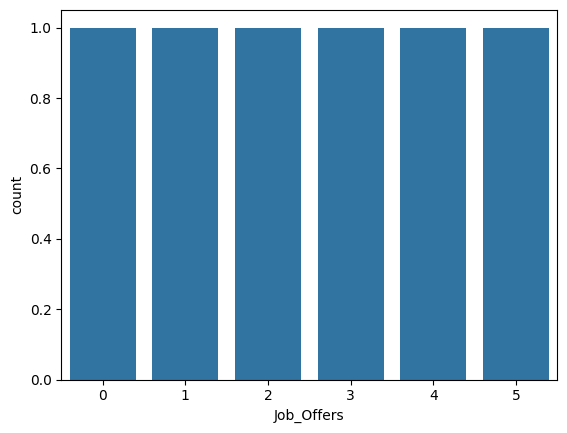

In [8]:
# Check the distribution of the target variable
sns.countplot(DIST_TARGET)
plt.show()

## DATA CLEANING AND PREPROCESSING

## FEATURE ENGINEERING

## MODELLING

### CLASSIFICATION RUN

In [9]:
data.columns

Index(['Student_ID', 'Age', 'Gender', 'High_School_GPA', 'SAT_Score',
       'University_Ranking', 'University_GPA', 'Field_of_Study',
       'Internships_Completed', 'Projects_Completed', 'Certifications',
       'Soft_Skills_Score', 'Networking_Score', 'Job_Offers',
       'Starting_Salary', 'Career_Satisfaction', 'Years_to_Promotion',
       'Current_Job_Level', 'Work_Life_Balance', 'Entrepreneurship'],
      dtype='object')

In [10]:
mod_colsj = ['Age', 'Gender', 'High_School_GPA', 'SAT_Score',
       'University_Ranking', 'University_GPA', 'Field_of_Study',
       'Internships_Completed', 'Projects_Completed', 'Certifications',
       'Soft_Skills_Score', 'Networking_Score', 'Job_Offers']

mod_colss = ['Age', 'Gender', 'High_School_GPA', 'SAT_Score',
       'University_Ranking', 'University_GPA', 'Field_of_Study',
       'Internships_Completed', 'Projects_Completed', 'Certifications',
       'Soft_Skills_Score', 'Networking_Score', 'Starting_Salary']

dataj = data[mod_colsj]
datas = data[mod_colss]

In [11]:
# check installed version
import pycaret
pycaret.__version__

'3.3.2'

In [12]:
# import pycaret classification and init setup
from pycaret.classification import *
s = setup(dataj, target = 'Job_Offers', session_id = 123)

# # import pycaret regression and init setup
# from pycaret.regression import *
# s = setup(data, target = 'charges', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Job_Offers
2,Target type,Multiclass
3,Original data shape,"(5000, 13)"
4,Transformed data shape,"(5000, 21)"
5,Transformed train set shape,"(3500, 21)"
6,Transformed test set shape,"(1500, 21)"
7,Numeric features,10
8,Categorical features,2
9,Preprocess,True


In [13]:
# compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.1711,0.4994,0.1711,0.1715,0.1709,0.0051,0.0051,0.8030
dummy,Dummy Classifier,0.1711,0.5000,0.1711,0.0293,0.0500,0.0000,0.0000,0.0090
dt,Decision Tree Classifier,0.1694,0.5016,0.1694,0.1690,0.1687,0.0032,0.0032,0.2020
catboost,CatBoost Classifier,0.1654,0.4961,0.1654,0.1648,0.1645,-0.0017,-0.0017,0.6770
svm,SVM - Linear Kernel,0.1649,0.0000,0.1649,0.0706,0.0720,-0.0002,-0.0002,0.0170
ada,Ada Boost Classifier,0.1646,0.0000,0.1646,0.1652,0.1635,-0.0027,-0.0028,0.0230
xgboost,Extreme Gradient Boosting,0.1631,0.4958,0.1631,0.1635,0.1629,-0.0044,-0.0044,0.0880
rf,Random Forest Classifier,0.1609,0.4917,0.1609,0.1601,0.1598,-0.0072,-0.0072,0.0420
qda,Quadratic Discriminant Analysis,0.1603,0.0000,0.1603,0.1303,0.1152,-0.0082,-0.0102,0.0090
nb,Naive Bayes,0.1600,0.4892,0.1600,0.1704,0.1511,-0.0084,-0.0086,0.2760


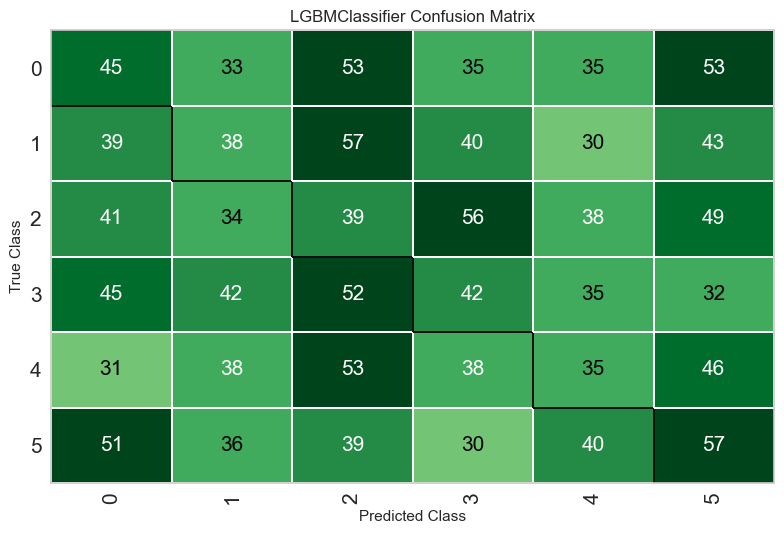

In [14]:
# plot confusion matrix
plot_model(best, plot = 'confusion_matrix')

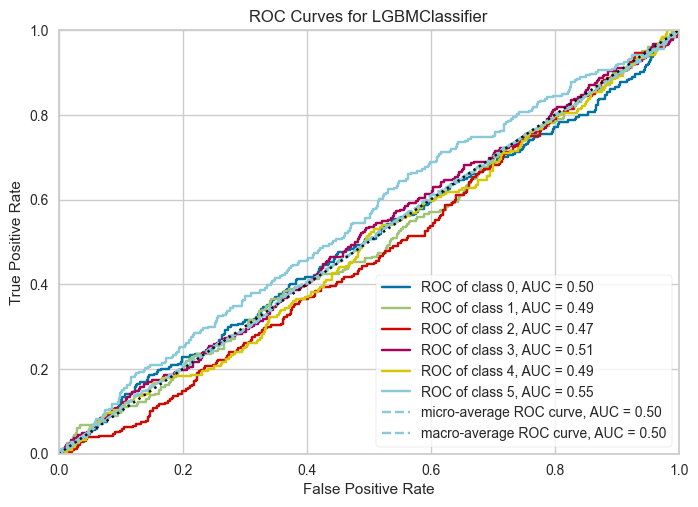

In [15]:
# plot AUC
plot_model(best, plot = 'auc')

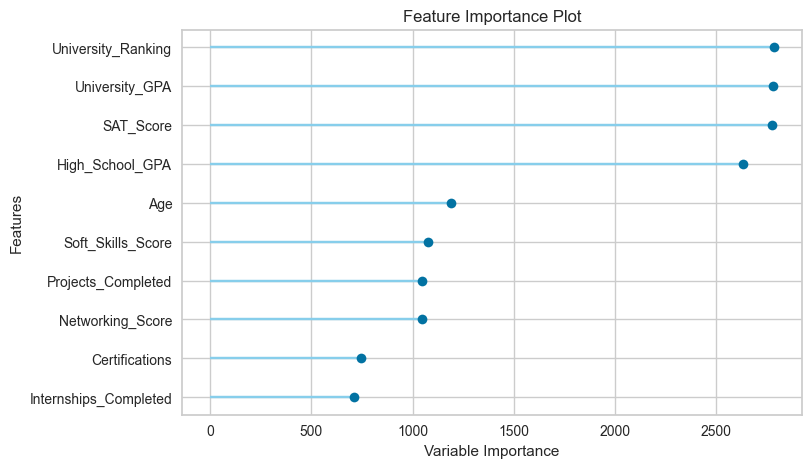

In [16]:
# plot feature importance
plot_model(best, plot = 'feature')

### REGRESSION RUN

In [17]:
# import pycaret regression and init setup
from pycaret.regression import *
s = setup(datas, target = 'Starting_Salary', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Starting_Salary
2,Target type,Regression
3,Original data shape,"(5000, 13)"
4,Transformed data shape,"(5000, 21)"
5,Transformed train set shape,"(3500, 21)"
6,Transformed test set shape,"(1500, 21)"
7,Numeric features,10
8,Categorical features,2
9,Preprocess,True


In [18]:
# compare baseline models
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
dummy,Dummy Regressor,11840.1916,212939936.0000,14588.5938,-0.0034,0.3086,0.2710,0.0090
omp,Orthogonal Matching Pursuit,11838.9162,212971528.5203,14589.6709,-0.0036,0.3086,0.2710,0.0070
br,Bayesian Ridge,11843.1974,213057946.6443,14592.6798,-0.0040,0.3086,0.2711,0.0080
en,Elastic Net,11856.5123,213354418.1127,14603.1313,-0.0055,0.3089,0.2714,0.0070
lr,Linear Regression,11866.7238,213859722.5256,14620.4856,-0.0079,0.3092,0.2716,0.0080
lasso,Lasso Regression,11866.6389,213855063.4959,14620.3228,-0.0079,0.3092,0.2716,0.0090
ridge,Ridge Regression,11866.6846,213857365.1473,14620.4045,-0.0079,0.3092,0.2716,0.0070
lar,Least Angle Regression,11866.7238,213859722.5256,14620.4856,-0.0079,0.3092,0.2716,0.0070
llar,Lasso Least Angle Regression,11866.6409,213855117.8641,14620.3247,-0.0079,0.3092,0.2716,0.0070
ada,AdaBoost Regressor,11906.8823,215255734.0708,14668.9324,-0.0148,0.3133,0.2788,0.0170


In [19]:
best = create_model('omp') #choose catboost to avoid plot errors with some models

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,11758.7009,204196590.2291,14289.7372,-0.0041,0.2972,0.2602
1,11701.1735,213025864.6351,14595.4056,0.0048,0.3080,0.2679
2,11741.4500,211728287.6254,14550.8861,-0.0015,0.3092,0.2688
3,11590.4927,208579590.6888,14442.2848,-0.0032,0.3147,0.2762
4,11469.5856,199358819.9218,14119.4483,0.0044,0.3023,0.2652
5,11801.1713,201246884.6929,14186.1512,-0.0189,0.3157,0.2875
6,12163.5507,224337212.9085,14977.8908,0.0006,0.3124,0.2745
7,11987.6130,222903452.7364,14929.9515,-0.0057,0.3142,0.2748
8,11935.6146,213455608.8115,14610.1201,0.0022,0.3090,0.2746


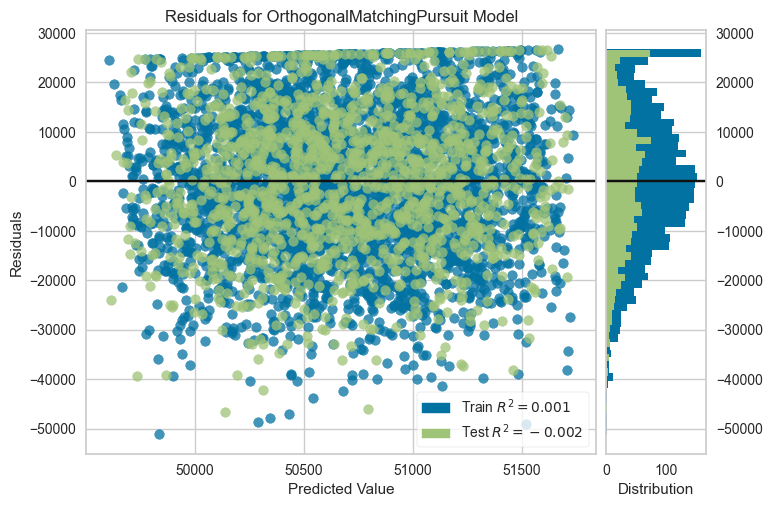

In [20]:
# plot residuals
plot_model(best, plot = 'residuals')

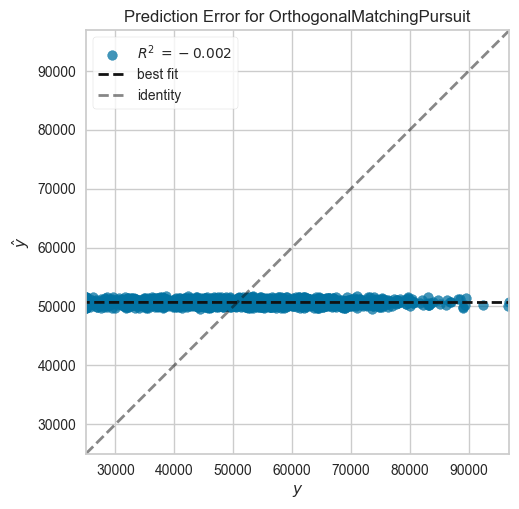

In [21]:
# plot error
plot_model(best, plot = 'error')

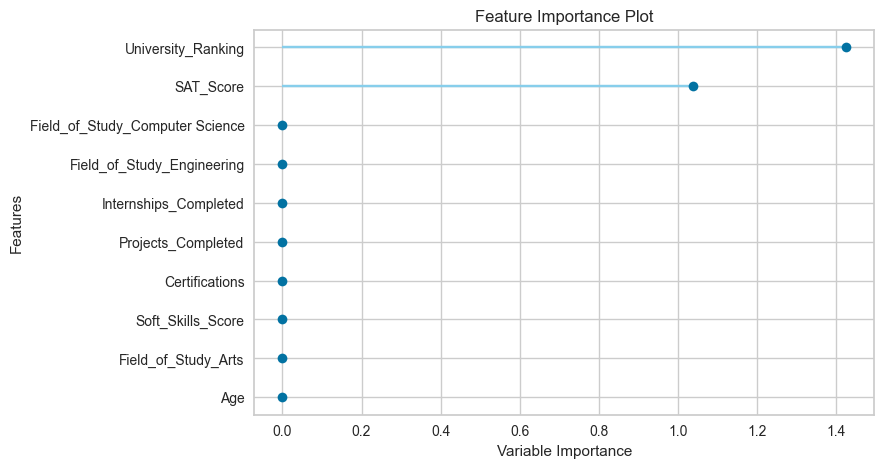

In [22]:
# plot feature importance
plot_model(best, plot = 'feature')